In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pandas import DataFrame
from fastapi import HTTPException
from typing import List, Any, Dict

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame
from typing import List, Any, Dict

### Load data
def df_load_csv(path: str, separator: str, column_names: List[str], **kwargs) -> DataFrame:
    """
    Loads data from CSV file and returns a DataFrame object.
    """
    # Load Data
    df = pd.read_csv(
        filepath_or_buffer=path ,sep=separator, names=column_names, **kwargs
    )

    return df

#### Data Manipulation
def df_drop_columns(df: DataFrame, columns: List[str]) -> DataFrame:
    df = df.drop(columns=columns)
    return df

def column_unique_values(df: DataFrame, column: str) -> List[Any]:
    unique = df[column].unique()
    return list(unique)

def df_filter_rows(df: DataFrame, column: str, value: Any) -> DataFrame:
    df = df[df[column] == value]
    return df

### Plots
def plot_df(df: DataFrame, columns: List[str], xlabel: str, ylabel: str):
    plt.figure(figsize=(10, 6))

    for column in columns:
        plt.plot(df[column], label=column)
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(columns)
    plt.show()

def plot_scatter(df: DataFrame, x: str, y: str, xlabel: str, ylabel: str):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x], df[y])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


def plot_correlation_matrix(df: DataFrame):
    df = df.select_dtypes(include=[np.number])

    corr = df.corr().abs()

    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()

### Feature Engineering
def df_rolling_mean(df: pd.DataFrame, columns: List[str], window: int) -> pd.DataFrame:
    df_copy = df.copy()  # Work on a copy of the DataFrame
    for column in columns:
        # Calculate rolling mean
        df_copy[f'{column}_rolling_mean'] = df_copy[column].rolling(window=window).mean()
    return df_copy

def df_rolling_std(df: pd.DataFrame, columns: List[str], window: int) -> pd.DataFrame:
    df_copy = df.copy()  # Work on a copy of the DataFrame
    for column in columns:
        # Calculate rolling std
        df_copy[f'{column}_rolling_std'] = df_copy[column].rolling(window=window).std()
    return df_copy

def df_rolling_skewness(df: pd.DataFrame, columns: List[str], window: int) -> pd.DataFrame:
    df_copy = df.copy()  # Work on a copy of the DataFrame
    for column in columns:
        # Calculate rolling skewness
        df_copy[f'{column}_rolling_skewness'] = df_copy[column].rolling(window=window).skew()
    return df_copy

def df_remaining_useful_life(df: DataFrame, column: str) -> DataFrame:
    max_time_variable = df[column].max()
    df['RUL'] = max_time_variable - df[column]
    return df
    
def df_classification_threshold(df: DataFrame, column: str, thresholds: List[int], categories: Dict[str, int]) -> DataFrame:
    bins = [-float('inf')] + thresholds + [float('inf')]
    labels = list(categories.keys())
    df[f"{column}_class"] = pd.cut(df[column], bins=bins, labels=labels)

    return df

In [88]:
index_names = ['Unit', 'Cycle']
setting_names = ['op_setting_1', 'op_setting_2', 'op_setting_3']
sensor_names = ['sensor_' + str(i) for i in range(1, 21)]

column_names = index_names + setting_names + sensor_names
separator = '\s+'
kwargs = {
    "header": None,
    "index_col": False,
}

path1 = '../data/raw/train_FD001.txt'
path2 = '../data/raw/train_FD002.txt'
path3 = '../data/raw/train_FD003.txt'
path4 = '../data/raw/train_FD004.txt'

df = df_load_csv(path1, separator, column_names, **kwargs)

df.head()


/var/folders/49/pdpmsz1x33g_s0glp3s0b0wh0000gn/T/ipykernel_34691/490101705.py:14: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(


,Unit,Cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90


In [9]:
units1 = column_unique_values(df1, 'Unit')
units2 = column_unique_values(df2, 'Unit')
units3 = column_unique_values(df3, 'Unit')
units4 = column_unique_values(df4, 'Unit')

print("Units in dataset 1: ", len(units1))
print(units1)
print("Units in dataset 2: ", len(units2))
print(units2)
print("Units in dataset 3: ", len(units3))
print(units3)
print("Units in dataset 4: ", len(units4))
print(units4)

NameError: name 'df1' is not defined

In [ ]:
df['Unit'] = df['Unit'] + 100
df2['Unit'] = df1['Unit'] + 200
df3['Unit'] = df1['Unit'] + 300
df4['Unit'] = df1['Unit'] + 400

units1 = column_unique_values(df1, 'Unit')
units2 = column_unique_values(df2, 'Unit')
units3 = column_unique_values(df3, 'Unit')
units4 = column_unique_values(df4, 'Unit')

In [ ]:
print("Units in dataset 1: ", len(units1))
print(units1)
print(df1['sensor_2'].max())
print(df1.head())


In [ ]:
print("Units in dataset 2: ", len(units2))
print(df2['sensor_2'].max())
print(df2.head())


In [ ]:
print("Units in dataset 3: ", len(units3))
print(df3['sensor_2'].max())
print(df3.head())


In [ ]:
print("Units in dataset 4: ", len(units4))
print(df4['sensor_2'].max())
print(df4.head())

In [ ]:
# concatenate the dataframes
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

print(df.head())

In [61]:
df[df['Unit']==1].head()

,Unit,Cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90


In [62]:
df[df['Unit']==2].head()

,Unit,Cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,...,46.93,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100.0,38.94
193,2,2,0.0043,-0.0003,100.0,518.67,641.82,1587.05,1393.13,14.62,...,47.24,522.70,2387.98,8131.09,8.4167,0.03,392,2388,100.0,39.06
194,2,3,0.0018,0.0003,100.0,518.67,641.55,1588.32,1398.96,14.62,...,47.22,522.58,2387.99,8140.58,8.3802,0.03,391,2388,100.0,39.11
195,2,4,0.0035,-0.0004,100.0,518.67,641.68,1584.15,1396.08,14.62,...,47.10,522.49,2387.93,8140.44,8.4018,0.03,391,2388,100.0,39.13
196,2,5,0.0005,0.0004,100.0,518.67,641.73,1579.03,1402.52,14.62,...,47.25,522.27,2387.94,8136.67,8.3867,0.03,390,2388,100.0,39.18


<Axes: xlabel='Cycle', ylabel='sensor_2'>

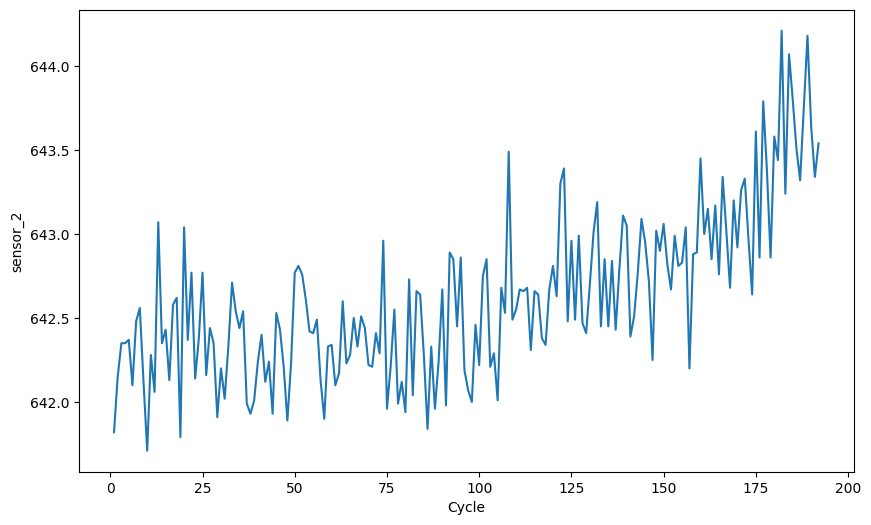

In [63]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Cycle', y='sensor_2', data=df[df["Unit"] < 2])

/var/folders/49/pdpmsz1x33g_s0glp3s0b0wh0000gn/T/ipykernel_34691/355406523.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='ID')


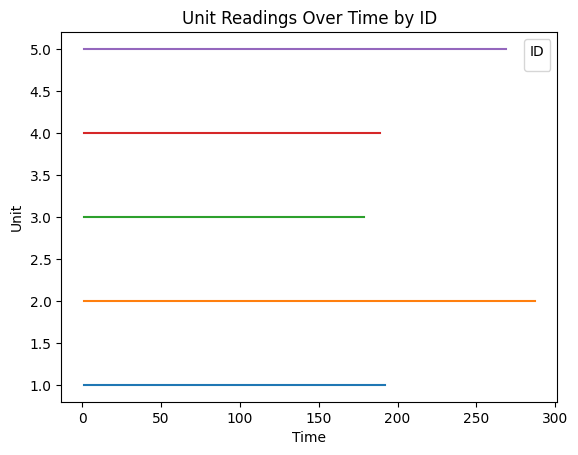

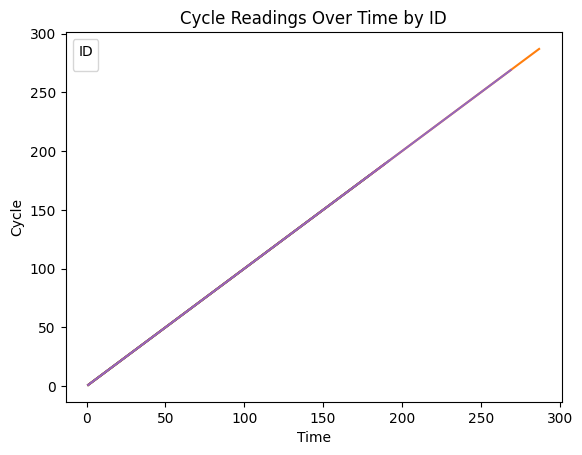

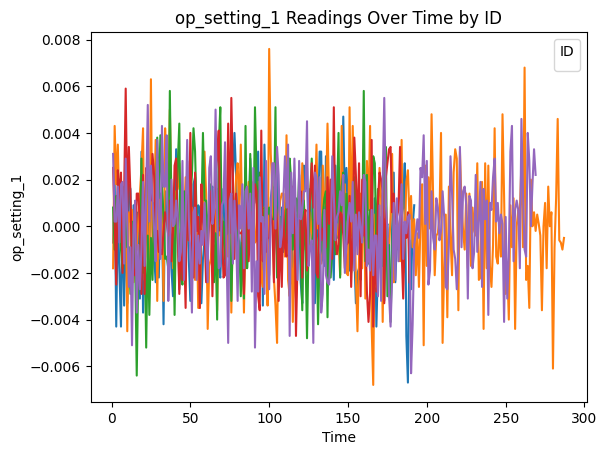

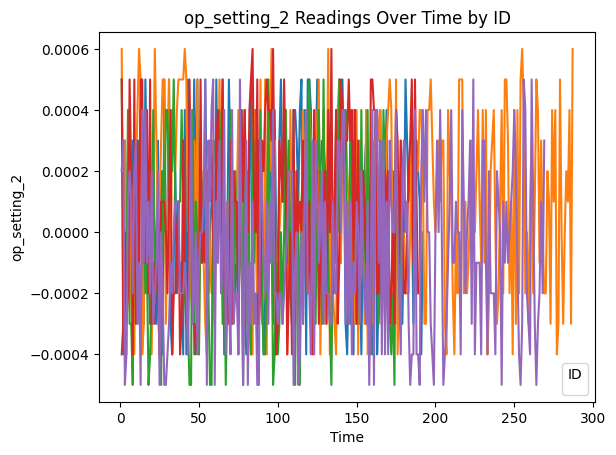

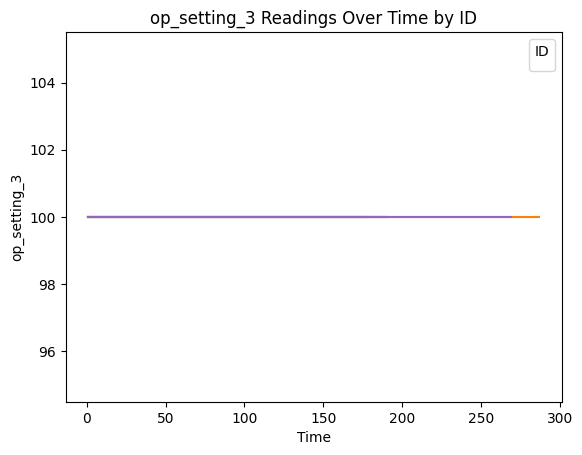

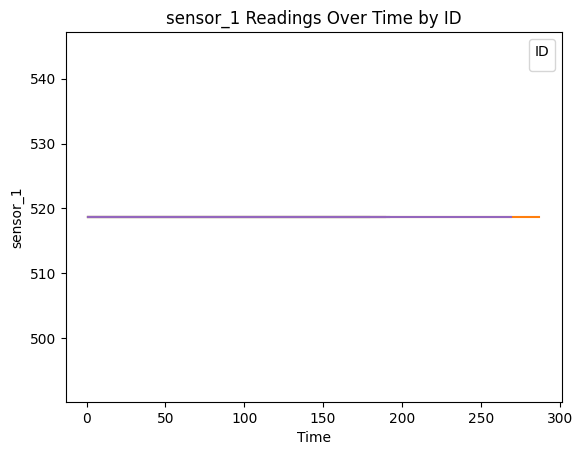

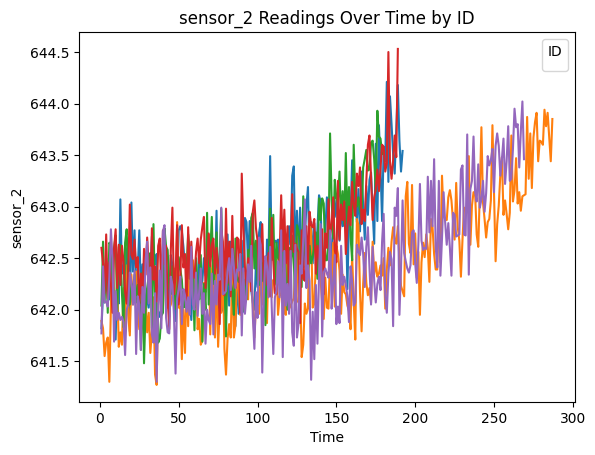

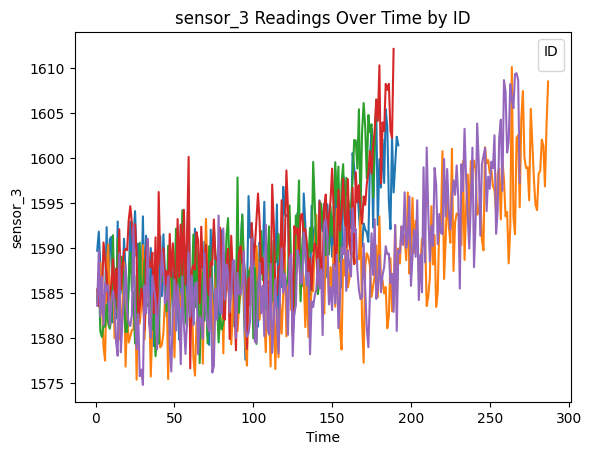

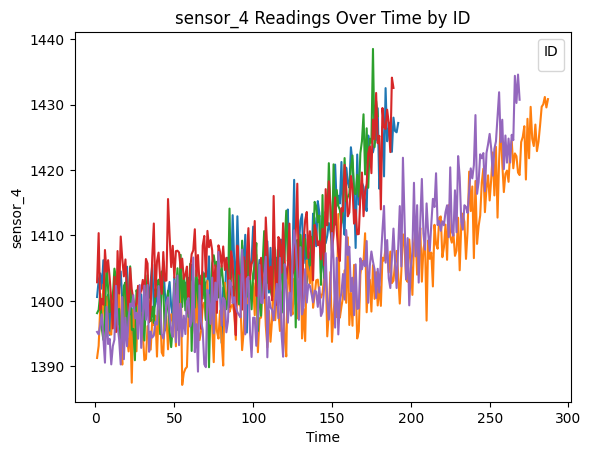

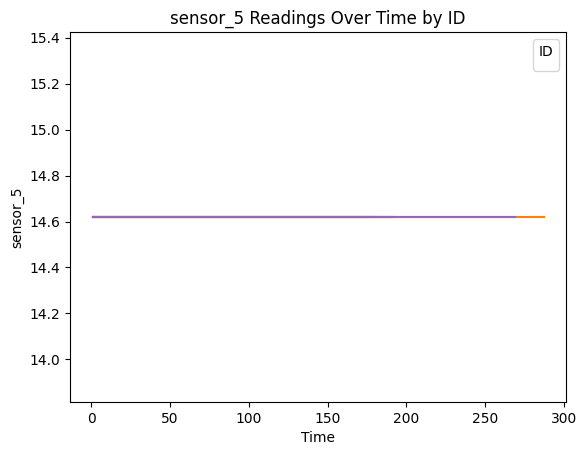

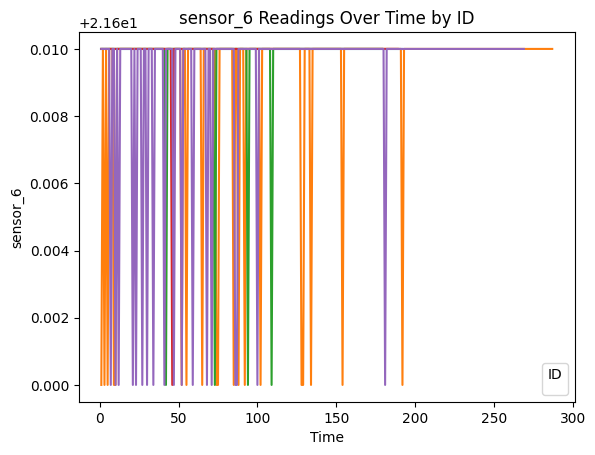

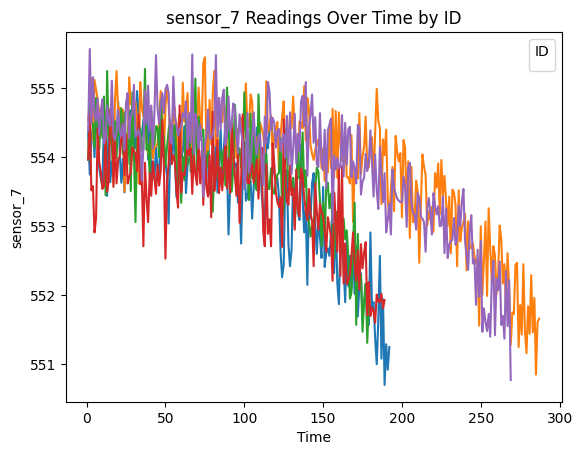

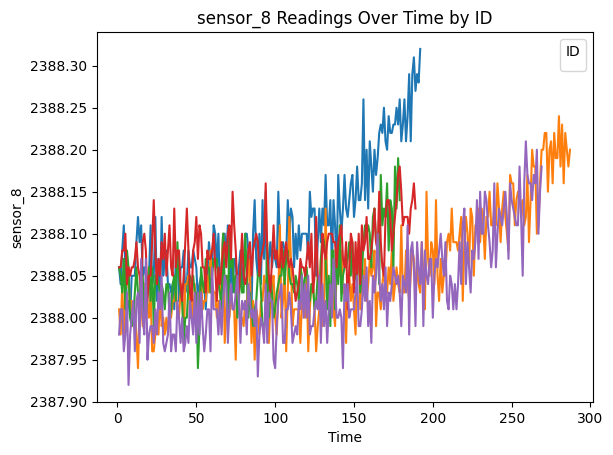

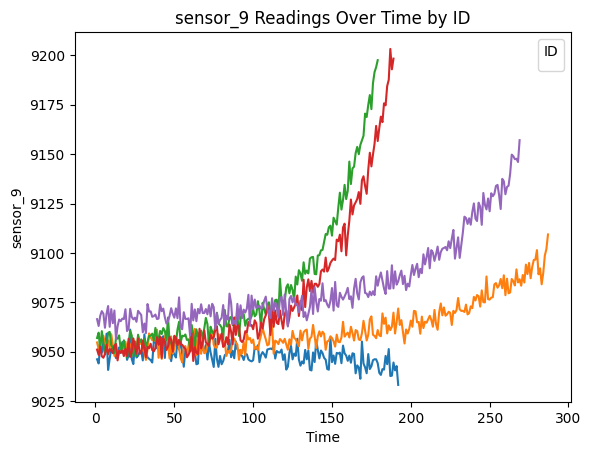

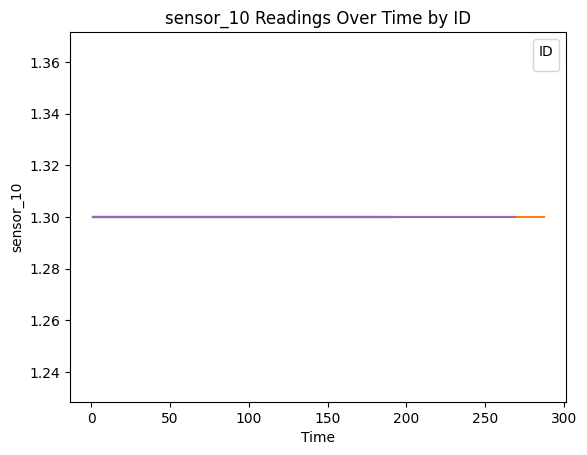

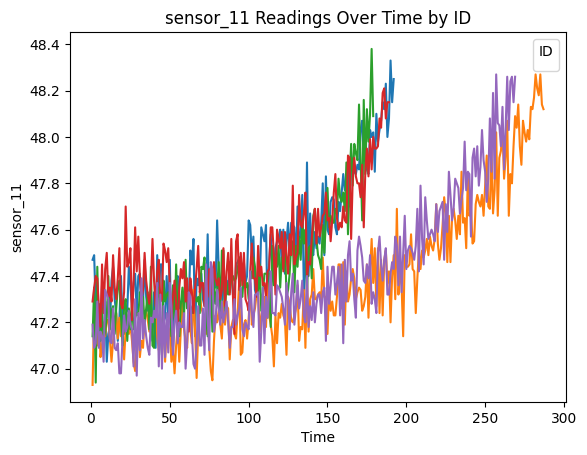

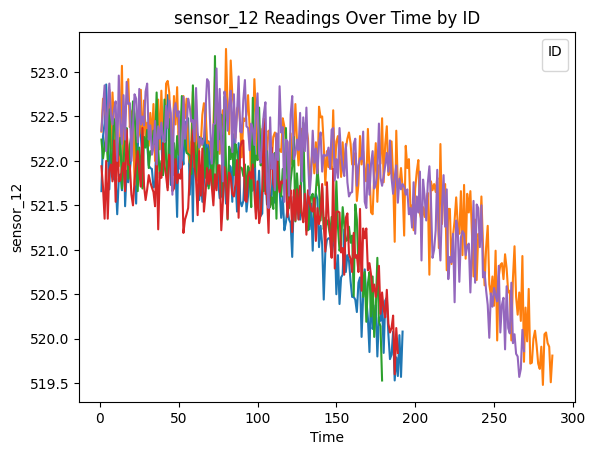

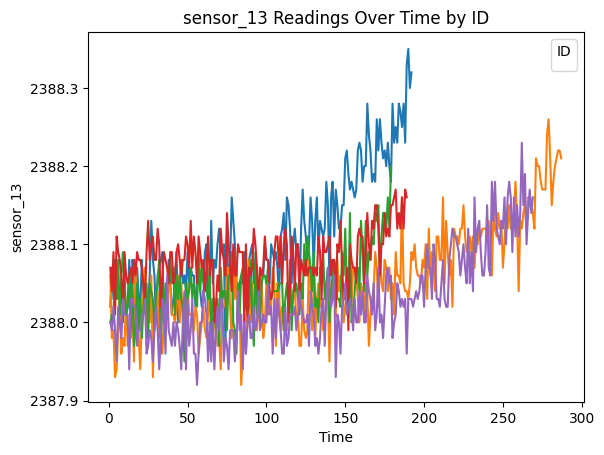

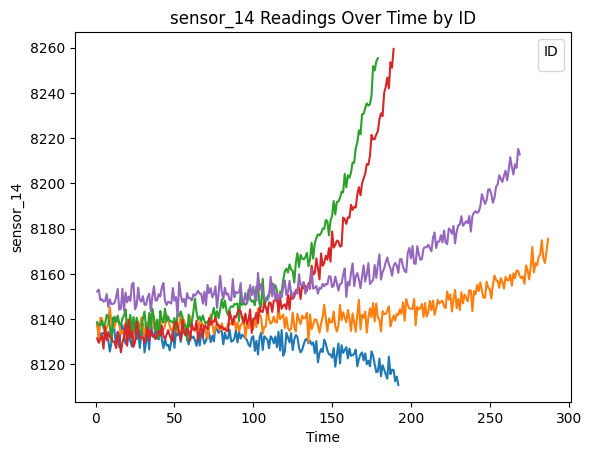

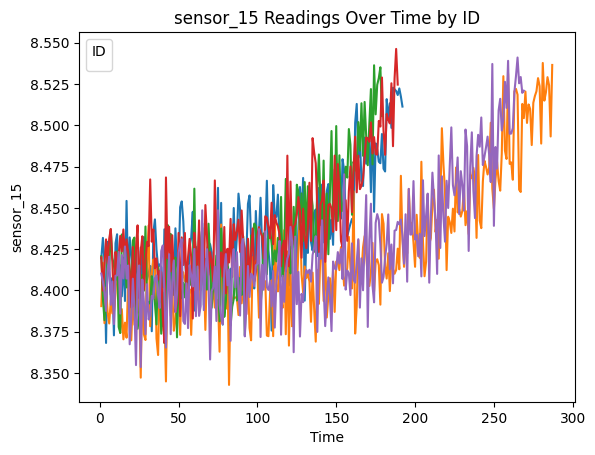

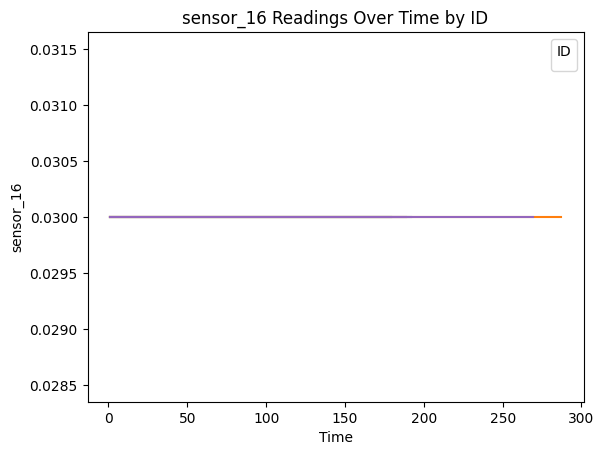

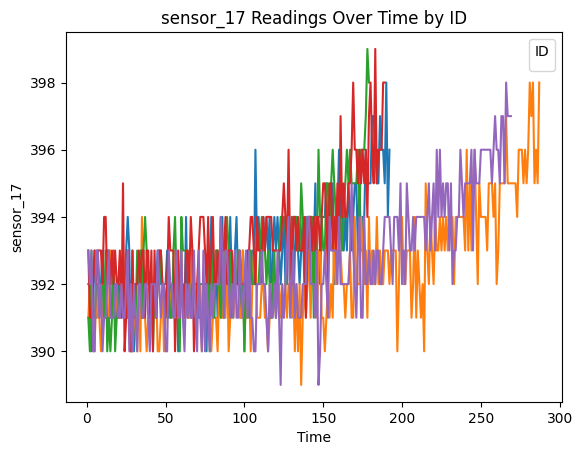

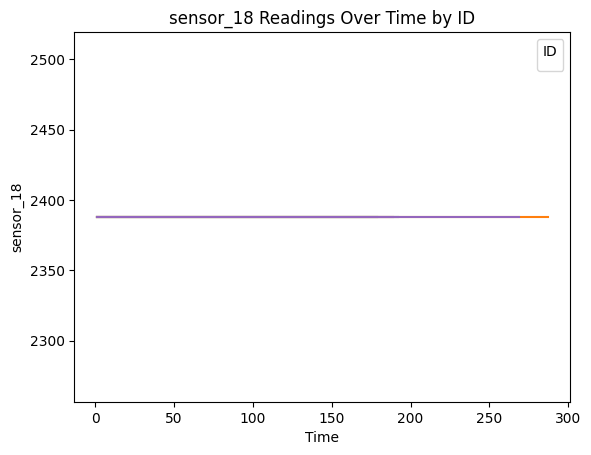

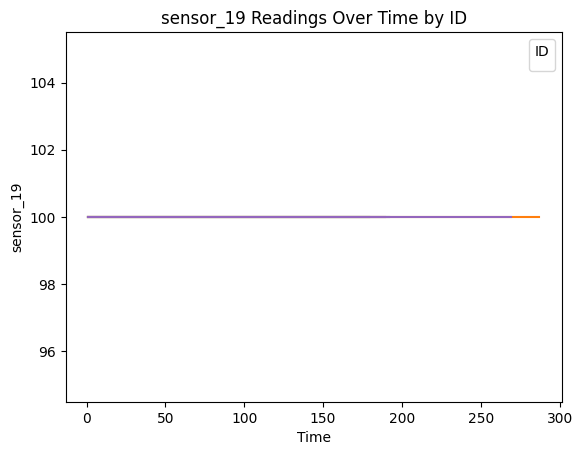

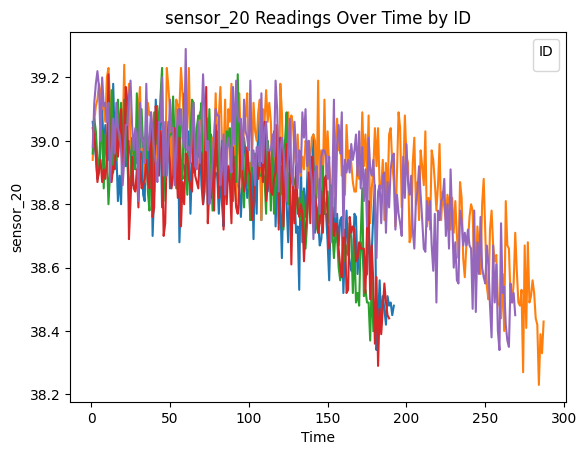

In [64]:
units = column_unique_values(df, 'Unit')

for column in df.columns:
    for unit in units[:5]:
        subset = df_filter_rows(df, 'Unit', unit)
        plt.plot(subset['Cycle'], subset[column])

    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.title(f'{column} Readings Over Time by ID')
    plt.legend(title='ID')

    # Show the plot
    plt.show()

In [65]:
# Drop constant columns
df = df_drop_columns(df, ['op_setting_1','op_setting_2','op_setting_3', 'sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19'])

df.shape[1]

15

In [66]:

max_columns = df.shape[1]

subsets = []

for unit in units:
    subset = df_filter_rows(df, 'Unit', unit)
    subset = df_rolling_mean(subset, subset.columns[2:max_columns], 5)
    subset = df_remaining_useful_life(subset, 'Cycle')
    subset = df_classification_threshold(subset, 'RUL', [50, 125, 200], {'urgent': 0, 'short': 1, 'medium': 2, 'long': 3 })    

    subsets.append(subset)

# create new dataframe
df = pd.concat(subsets)

df.dropna(inplace=True)

df.reset_index(drop=True, inplace=True)

df.head()

,Unit,Cycle,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,...,sensor_9_rolling_mean,sensor_11_rolling_mean,sensor_12_rolling_mean,sensor_13_rolling_mean,sensor_14_rolling_mean,sensor_15_rolling_mean,sensor_17_rolling_mean,sensor_20_rolling_mean,RUL,RUL_class
0,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,...,9049.566,47.328,522.282,2388.048,8134.194,8.41334,391.8,38.958,187,medium
1,1,6,642.10,1584.47,1398.37,554.67,2388.02,9049.68,47.16,521.68,...,9050.264,47.266,522.286,2388.050,8133.040,8.41160,391.6,38.942,186,medium
2,1,7,642.48,1592.32,1397.77,554.34,2388.02,9059.13,47.36,522.32,...,9053.276,47.240,522.294,2388.042,8133.206,8.40472,391.6,38.962,185,medium
3,1,8,642.56,1582.96,1400.97,553.85,2388.00,9040.80,47.24,522.47,...,9050.848,47.234,522.304,2388.042,8132.774,8.40268,391.8,38.966,184,medium
4,1,9,642.12,1590.98,1394.80,553.69,2388.05,9046.46,47.29,521.79,...,9050.244,47.266,522.090,2388.036,8131.146,8.40360,391.8,39.000,183,medium


In [69]:
df.columns

Index(['Unit', 'Cycle', 'sensor_2_rolling_mean', 'sensor_3_rolling_mean',
       'sensor_4_rolling_mean', 'sensor_7_rolling_mean',
       'sensor_8_rolling_mean', 'sensor_9_rolling_mean',
       'sensor_11_rolling_mean', 'sensor_12_rolling_mean',
       'sensor_13_rolling_mean', 'sensor_14_rolling_mean',
       'sensor_15_rolling_mean', 'sensor_17_rolling_mean',
       'sensor_20_rolling_mean', 'RUL', 'RUL_class'],
      dtype='object')

In [68]:
sensor_names = ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7',
       'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20']

df = df_drop_columns(df, sensor_names)

df.head()

KeyError: "['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20'] not found in axis"

In [70]:
df.shape

(20231, 17)

<Axes: xlabel='Cycle', ylabel='sensor_2_rolling_mean'>

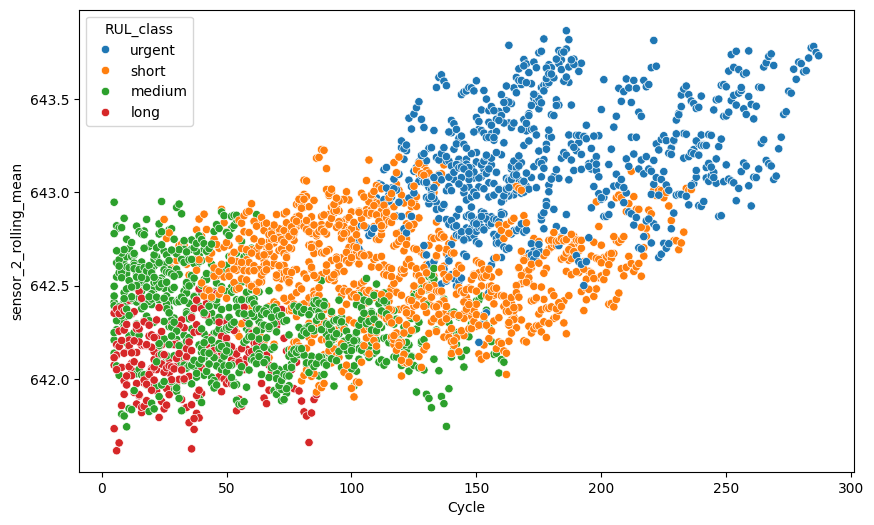

In [71]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cycle', y='sensor_2_rolling_mean', data=df[df["Unit"] < 15], hue='RUL_class')

In [72]:
X = df.drop(columns=['RUL', 'Cycle', 'Unit', 'RUL_class'])
y = df[['RUL', 'Cycle', 'RUL_class']]

In [73]:
X.head()

,sensor_2_rolling_mean,sensor_3_rolling_mean,sensor_4_rolling_mean,sensor_7_rolling_mean,sensor_8_rolling_mean,sensor_9_rolling_mean,sensor_11_rolling_mean,sensor_12_rolling_mean,sensor_13_rolling_mean,sensor_14_rolling_mean,sensor_15_rolling_mean,sensor_17_rolling_mean,sensor_20_rolling_mean
0,642.208,1587.030,1403.206,554.164,2388.070,9049.566,47.328,522.282,2388.048,8134.194,8.41334,391.8,38.958
1,642.264,1585.984,1402.760,554.226,2388.062,9050.264,47.266,522.286,2388.050,8133.040,8.41160,391.6,38.942
2,642.330,1586.084,1401.686,554.344,2388.058,9053.276,47.240,522.294,2388.042,8133.206,8.40472,391.6,38.962
3,642.372,1585.078,1401.040,554.262,2388.042,9050.848,47.234,522.304,2388.042,8132.774,8.40268,391.8,38.966
4,642.326,1586.716,1399.626,554.110,2388.030,9050.244,47.266,522.090,2388.036,8131.146,8.40360,391.8,39.000


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [75]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()

,sensor_2_rolling_mean,sensor_3_rolling_mean,sensor_4_rolling_mean,sensor_7_rolling_mean,sensor_8_rolling_mean,sensor_9_rolling_mean,sensor_11_rolling_mean,sensor_12_rolling_mean,sensor_13_rolling_mean,sensor_14_rolling_mean,sensor_15_rolling_mean,sensor_17_rolling_mean,sensor_20_rolling_mean
0,-1.135956,-0.702444,-0.696116,0.995692,-0.399924,-0.736140,-0.854430,1.280726,-0.725546,-0.515888,-0.880481,-1.102143,0.913367
1,-0.999374,-0.917735,-0.751680,1.074515,-0.524810,-0.702846,-1.107980,1.286703,-0.694746,-0.579309,-0.934723,-1.260765,0.808328
2,-0.838402,-0.897153,-0.885483,1.224531,-0.587254,-0.559179,-1.214307,1.298657,-0.817945,-0.570186,-1.149197,-1.260765,0.939627
3,-0.735965,-1.104211,-0.965963,1.120282,-0.837028,-0.674991,-1.238844,1.313600,-0.817945,-0.593927,-1.212791,-1.102143,0.965887
4,-0.848158,-0.767072,-1.142124,0.927041,-1.024358,-0.703800,-1.107980,0.993823,-0.910343,-0.683397,-1.184111,-1.102143,1.189094


In [76]:
X_scaled_df = pd.concat([X_scaled_df, y], axis=1)

X_scaled_df.head()

,sensor_2_rolling_mean,sensor_3_rolling_mean,sensor_4_rolling_mean,sensor_7_rolling_mean,sensor_8_rolling_mean,sensor_9_rolling_mean,sensor_11_rolling_mean,sensor_12_rolling_mean,sensor_13_rolling_mean,sensor_14_rolling_mean,sensor_15_rolling_mean,sensor_17_rolling_mean,sensor_20_rolling_mean,RUL,Cycle,RUL_class
0,-1.135956,-0.702444,-0.696116,0.995692,-0.399924,-0.736140,-0.854430,1.280726,-0.725546,-0.515888,-0.880481,-1.102143,0.913367,187,5,medium
1,-0.999374,-0.917735,-0.751680,1.074515,-0.524810,-0.702846,-1.107980,1.286703,-0.694746,-0.579309,-0.934723,-1.260765,0.808328,186,6,medium
2,-0.838402,-0.897153,-0.885483,1.224531,-0.587254,-0.559179,-1.214307,1.298657,-0.817945,-0.570186,-1.149197,-1.260765,0.939627,185,7,medium
3,-0.735965,-1.104211,-0.965963,1.120282,-0.837028,-0.674991,-1.238844,1.313600,-0.817945,-0.593927,-1.212791,-1.102143,0.965887,184,8,medium
4,-0.848158,-0.767072,-1.142124,0.927041,-1.024358,-0.703800,-1.107980,0.993823,-0.910343,-0.683397,-1.184111,-1.102143,1.189094,183,9,medium


<Axes: xlabel='Cycle', ylabel='sensor_9_rolling_mean'>

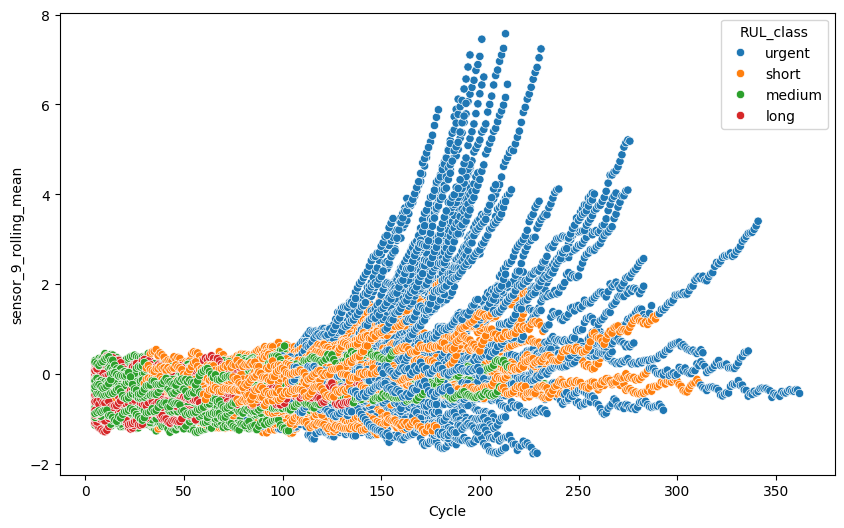

In [77]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cycle', y=X_scaled_df.columns[5], data=X_scaled_df, hue='RUL_class')

In [78]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)

# Fit and transform data
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Display explained variance
print(f"Explained variance: {explained_variance}")
print(f"Cumulative explained variance: {explained_variance.cumsum()}")

Explained variance: [0.77684135 0.16719276]
Cumulative explained variance: [0.77684135 0.94403411]


In [80]:
X_pca_df = pd.concat([X_pca, y], axis=1)

In [85]:
X_pca_df[X_pca_df['RUL_class']=='urgent'].max().head()

PC1          9.065006
PC2          9.408794
RUL                50
Cycle             362
RUL_class      urgent
dtype: object

<Axes: xlabel='PC1', ylabel='PC2'>

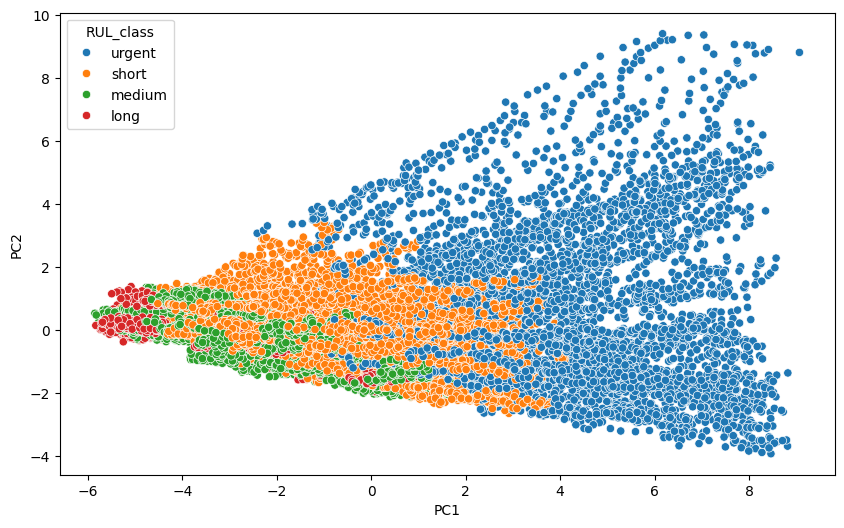

In [83]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=X_pca_df, hue='RUL_class')

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, categories):
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fit a random forest model
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Predict the categories
y_pred = model.predict(X_test_scaled)

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, [0, 1])